Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [93]:
df = pd.read_csv('/Users/peter/Downloads/nba-players-stats/player_data.csv').dropna()

In [94]:
df.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
10,Alex Acker,2006,2009,G,6-5,185.0,"January 21, 1983",Pepperdine University


### 1. Построим распределение данных по году начала карьеры. Посмотрим в каком году стартовали карьеру наибольшее и наменьшее число спортсменов.

In [138]:
df1 = df.groupby('year_start').count().reset_index()
df1.head(10)

,year_start,name,year_end,position,height,weight,birth_date,college,birth_year,age_carier_end
0,1947,147,147,147,147,147,147,147,147,147
1,1948,37,37,37,37,37,37,37,37,37
2,1949,91,91,91,91,91,91,91,91,91
3,1950,115,115,115,115,115,115,115,115,115
4,1951,30,30,30,30,30,30,30,30,30
5,1952,29,29,29,29,29,29,29,29,29
6,1953,33,33,33,33,33,33,33,33,33
7,1954,32,32,32,32,32,32,32,32,32
8,1955,33,33,33,33,33,33,33,33,33
9,1956,27,27,27,27,27,27,27,27,27


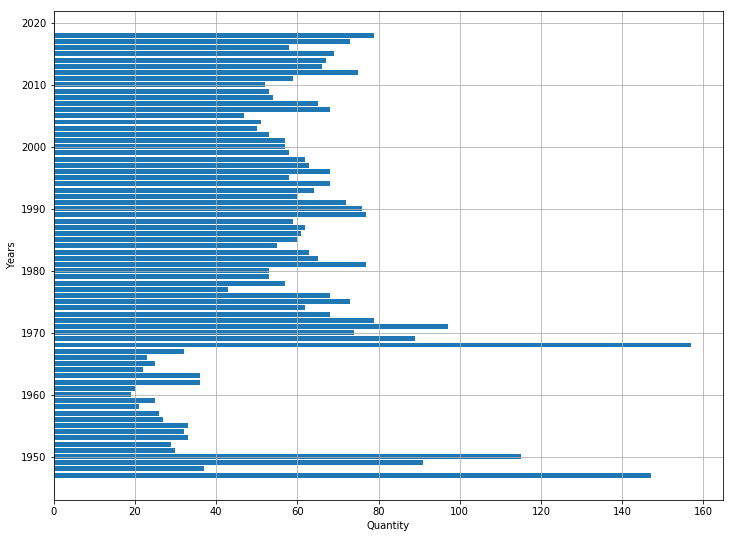

In [97]:
plt.barh(df1['year_start'], df1['name'])
plt.xlabel('Quantity')
plt.ylabel('Years')
plt.grid()

### 2. Построим график box-plot по возрасту завершения карьеры. Посмотрим какая медиана в датафрейме, есть ли выбросы и как распределены наши данные. 

In [117]:
df['birth_date'] = df['birth_date'].apply(lambda x: str(x))
df['birth_year'] = df['birth_date'].apply(lambda x: int(x.split(',')[-1]))

In [118]:
df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1968
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1946
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1947
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1969
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1974


In [122]:
df['age_carier_end'] = (df['year_end'] - df['birth_year'])

In [124]:
df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year,age_carier_end
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1968,27
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1946,32
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1947,42
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1969,32
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1974,29


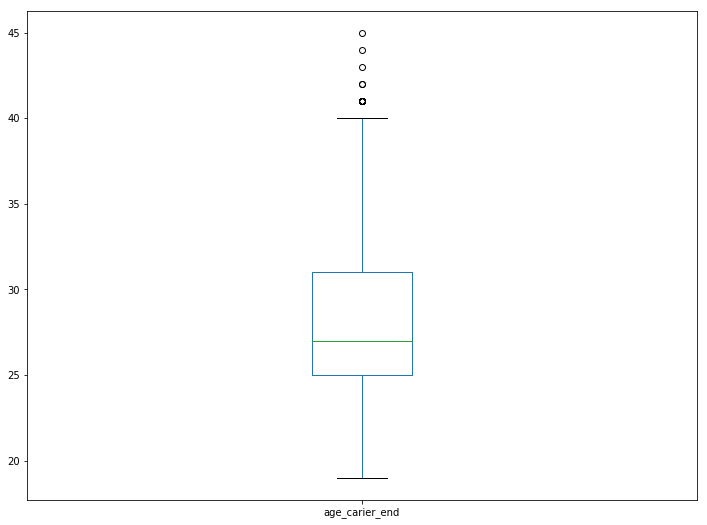

In [136]:
df['age_carier_end'].plot(kind='box')

In [133]:
df['age_carier_end'].mean()

28.159743650605268

In [134]:
df['age_carier_end'].max()

45

In [135]:
df['age_carier_end'].min()

19

### 3. Построим круговую диаграмму, получим ТОП-5 университетов поставляющих спортсменов в NBA.

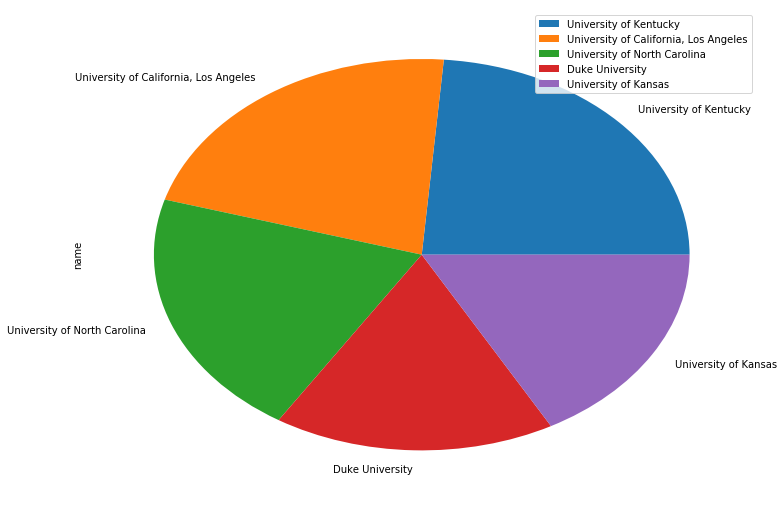

In [167]:
university = df.groupby('college').count().sort_values('name', ascending=False).head(5)
university = university.filter(items = ['college', 'name'])
university.head()
university.plot(kind='pie', y='name')

### 4. На всякий случай проверим, как коррелируют между собой возраст завершения карьеры и количество лет в спортивной лиге. Несмотря на выбросы, корреляция сильная, что естественно.

In [169]:
df['how_many_years_play'] = df['year_end']-df['year_start']

In [170]:
df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year,age_carier_end,how_many_years_play
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1968,27,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,1946,32,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",1947,42,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,1969,32,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,1974,29,5


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


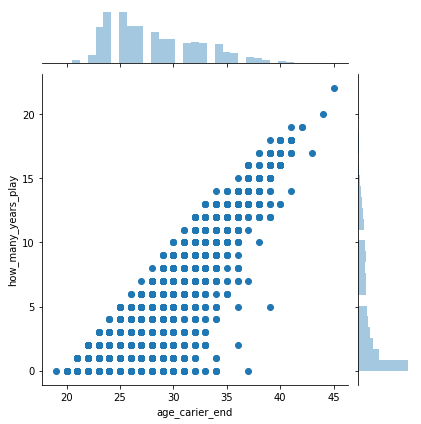

In [178]:
import seaborn as sns
sns.jointplot(x='age_carier_end', y='how_many_years_play', 
              data=df, kind='scatter')


### 5. Построим график по количеству лет в спортивной карьере и году старта карьеры в NBA. Видим что начиная с 1950 растет кол-во отыгранных лет в NBA. Ближе к концу 2019 года это количество снижается, но скорее всего это связано с недостаточным количеством данных в выборках по годам, близким к 2019.

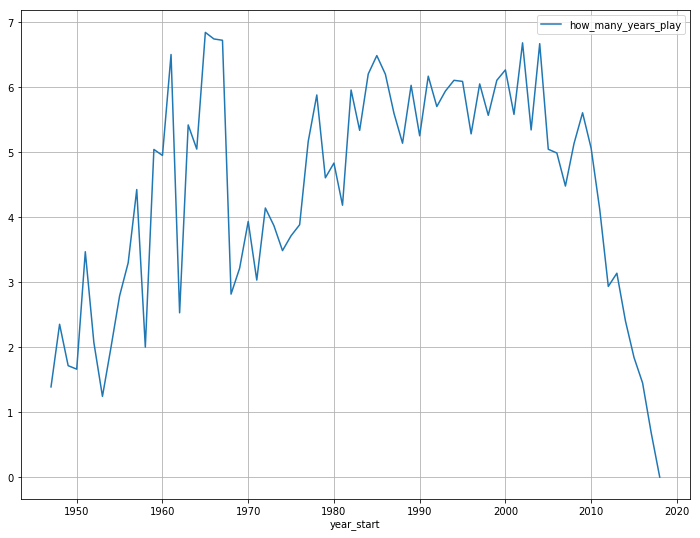

In [177]:
df2 = df.groupby('year_start').agg({'how_many_years_play': 'mean',})
df2.plot()
plt.grid()

### 6. Проверим есть ли корреляция между кол-вом спортсменов начавших карьеру и тех, кто ушел на пенсию в этом же году. Есть положительная корреляция.

In [187]:
df1 = df.groupby('year_start').count().reset_index().filter(items=['year_start','name'])
df2 = df.groupby('year_end').count().reset_index().filter(items=['year_end','name'])

In [192]:
df1.columns = ['year','count_start']
df1.head()

,year,count_start
0,1947,147
1,1948,37
2,1949,91
3,1950,115
4,1951,30


In [193]:
df2.columns = ['year','count_end']
df2.head()

,year,count_end
0,1947,78
1,1948,26
2,1949,71
3,1950,99
4,1951,51


In [200]:
joined = df1.merge(df2, on='year', how='left')

In [195]:
joined.head()

,year,count_start,count_end
0,1947,147,78
1,1948,37,26
2,1949,91,71
3,1950,115,99
4,1951,30,51


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


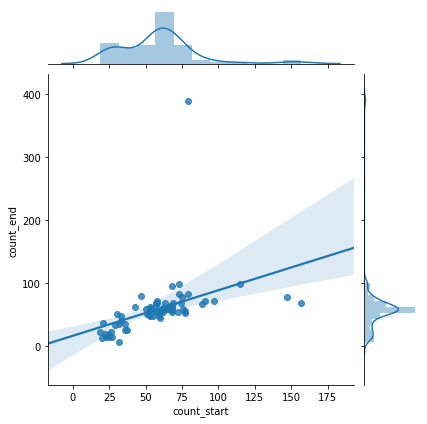

In [203]:
sns.jointplot(x='count_start', y='count_end', 
              data=joined, kind='reg')